<a href="https://colab.research.google.com/github/wp225/task/blob/main/rectangle_alignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [301]:
import cv2
import numpy as np 
from google.colab.patches import cv2_imshow

In [302]:
image=cv2.imread('/content/task.png')
height_, width_, channels = image.shape
blank_image = np.ones((height_, width_, channels), np.uint8) * 255
#cv2_imshow(image)
print(height)

184


In [303]:
imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5, 5), np.uint8)
img_erosion = cv2.erode(imgray, kernel, iterations=1)
#im_show(img_erosion)
ret, thresh = cv2.threshold(img_erosion, 20, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
mask = 255 - thresh
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [304]:
new=[]
for cont in contours:
 rect = cv2.minAreaRect(cont)
 box = cv2.boxPoints(rect)
 box = np.int0(box)


 scale = 1 
 W = rect[1][0]
 H = rect[1][1]

 Xs = [i[0] for i in box]
 Ys = [i[1] for i in box]
 x1 = min(Xs)
 x2 = max(Xs)
 y1 = min(Ys)
 y2 = max(Ys)

 angle = rect[2]
 #print(angle)
 rotated = False
 if angle >45:
    angle -= 90
    rotated = True
 else:
    angle-=360
    rotated = False
    
 center = (int((x1+x2)/2), int((y1+y2)/2))
 size = (int(scale*(x2-x1)), int(scale*(y2-y1)))

 M = cv2.getRotationMatrix2D((size[0]/2, size[1]/2), angle, 1.0)

 cropped = cv2.getRectSubPix(image, size, center)
 cropped = cv2.warpAffine(cropped, M, size)

 croppedW = W if not rotated else H
 croppedH =  H if not rotated else W

 new.append(cv2.getRectSubPix(cropped, (int(croppedW*scale), int(croppedH*scale)), (size[0]/2, size[1]/2)))
 
  

In [305]:
blank_image[0:new[0].shape[0], 0:new[0].shape[1]] += new[0]
blank_image[new[0].shape[0]:new[0].shape[0]+new[1].shape[0], 0:new[1].shape[1]] += new[1]
blank_image[new[0].shape[0]+new[1].shape[0]:new[0].shape[0]+new[1].shape[0]+new[2].shape[0], 0:new[2].shape[1]] += new[2]
blank_image[new[0].shape[0]+new[1].shape[0]+new[2].shape[0]:new[0].shape[0]+new[1].shape[0]+new[2].shape[0]+new[3].shape[0], 0:new[3].shape[1]] += new[3]

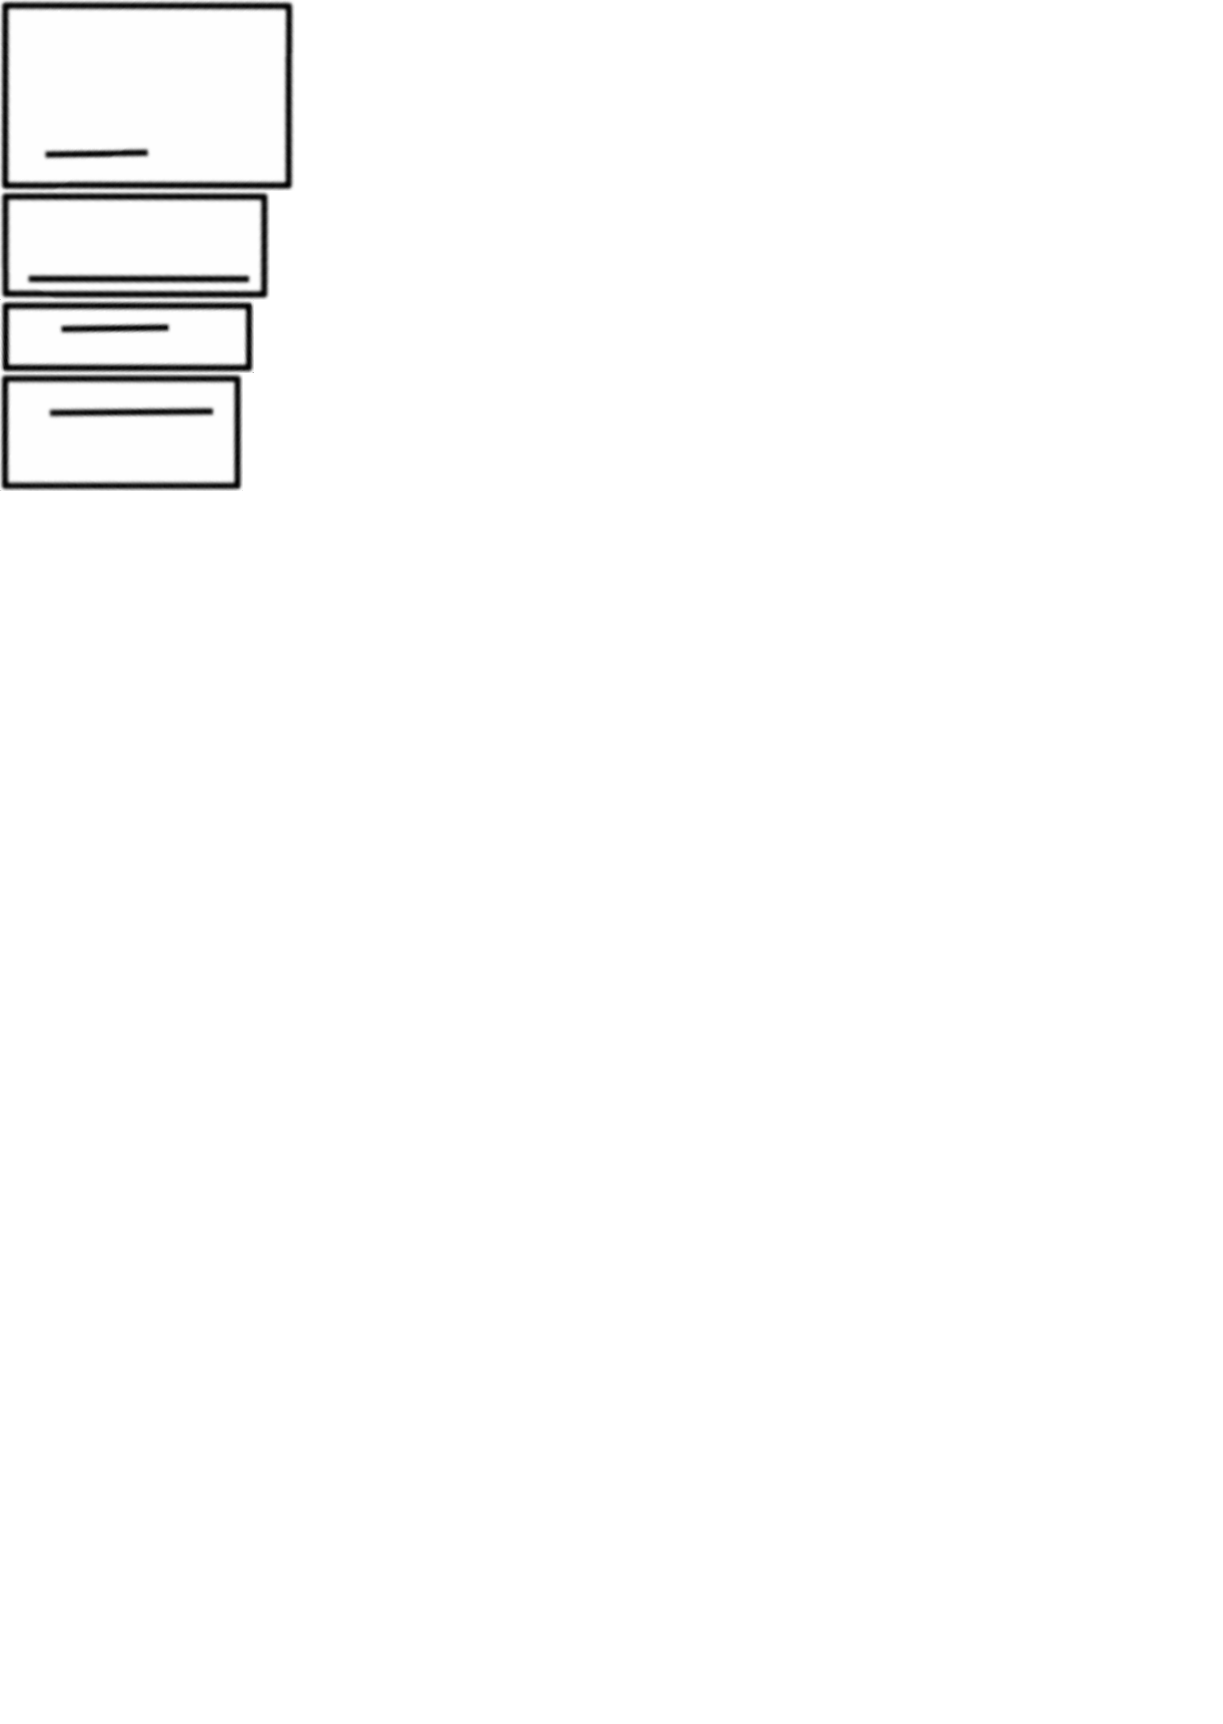

In [306]:
cv2_imshow(blank_image)